In [2]:
#import external dependencies
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import sklearn as sk
import os

In [3]:
# contrast enhancement function
def contrast_enhancement(img):
    # Apply histogram equalization
    eq = cv2.equalizeHist(img) 
    return eq

In [4]:
# image segmentation function
def image_segmentation(img):
    #convert to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply Otsu's thresholding method to binarize the image
    ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    return thresh

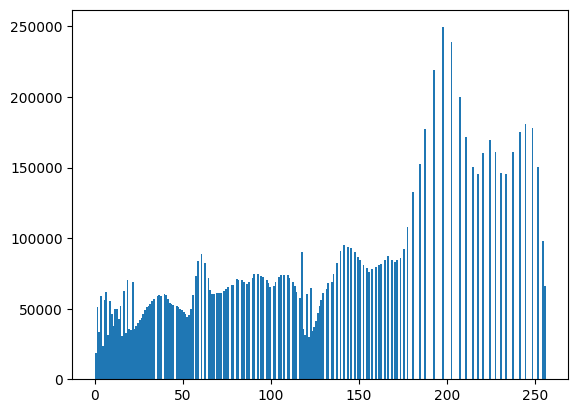

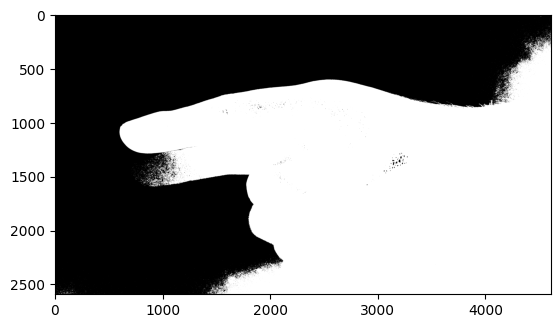

In [19]:
image = io.imread('data/men/1/1_men (3).JPG')
plt.imshow(image_segmentation(contrast_enhancement(image)),cmap = 'gray')

In [ ]:
# pre processing 
# we want to take the rgb as an input and output the binary image the hand in white and the background in black
def preprocess(image):
    # first step is contrast enhance the image
    
    return inhancedImage

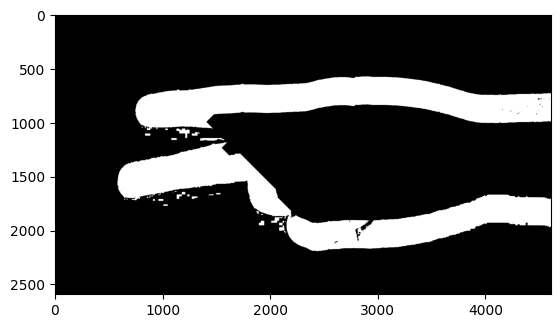

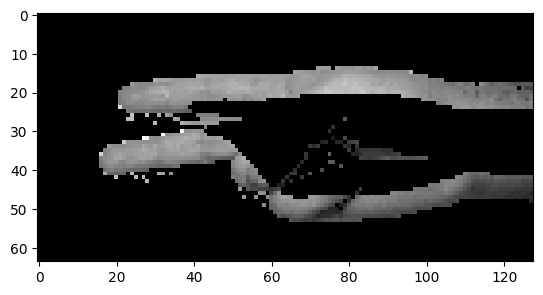

In [46]:
import cv2
import numpy as np
import skin_color_segmentation as scs

# Read the input image
img = io.imread('data/men/2/2_men (2).JPG')

# img = cv2.resize(img, (128, 64))
# Convert the image to LAB color space
lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

# Split the LAB channels
l, a, b = cv2.split(lab)

# Normalize the L channel
l_norm = cv2.normalize(l, None, 0, 255, cv2.NORM_MINMAX)

# Combine the normalized L channel with the original A and B channels
lab_norm = cv2.merge((l_norm, a, b))

# Apply Macenko's method to the normalized LAB image
normalizer = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(8,8))
lab_norm_clahe = normalizer.apply(lab_norm[:,:,0])
lab_norm[:,:,0] = lab_norm_clahe

# Convert the normalized LAB image back to RGB color space
invariant_img = cv2.cvtColor(lab_norm, cv2.COLOR_LAB2RGB)

#segment the image 
enhanced = scs.process(img,thresh = 0.3)
# Display the results
# segmented2 = cv2.dilate(enhanced, np.array([[0,1,0],[1,1,1],[0,1,0]],dtype = np.uint8), iterations=70)
# segmented2 = cv2.erode(segmented2, np.array([[0,1,0],[1,1,1],[0,1,0]],dtype = np.uint8), iterations=400)
# segmented2 = cv2.dilate(segmented2, np.array([[0,1,0],[1,1,1],[0,1,0]],dtype = np.uint8), iterations=70)
# segmented2 = enhanced - segmented2
plt.figure()
plt.imshow(segmented2, cmap='gray')
mask = cv2.resize(segmented2,(128,64))
mask[mask > 0] = 1

image = cv2.resize(img,(128,64))
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image[mask == 0] = 0
plt.figure()
plt.imshow(image, cmap='gray')
